# Read a netcdf file and make a contour plot of the data

In this example, we demonstrate:
1. How to read a netcdf file in Python using `xarray` 
2. How to make a contour plot of the data

## Data
We will read CMIP5 data for surface air temperature (tas) from the RCP8.5 scenario produced by the NCAR/CCSM4 model. For this example, we will read the first ensemble member.

For the external tutorial, we have extracted the tropical Pacific to reduce the data size.

## Python import statements
You must first import the Python packages you wish to use. 
This is a common set of basic import statments you can start with.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

Set the path and filename

In [4]:
fname='data/tas_Amon_CCSM4_rcp45_r1i1p1_200601-210012_TropPac.nc'

Read the data using `xarray` `open_dataset` http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html

In [5]:
ds=xr.open_dataset(fname)

When you read in data using `xarray`, it creates an object called an `xarray.Dataset` which consists of your data and all its metadata. If we print out our `Dataset` which is called `ds`, its similar to doing a `ncdump -h` on a netcdf file. You can see all the dimensions, size, and attributes of the data in the file.

In [6]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 22, lon: 169, time: 1140)
Coordinates:
  * time       (time) object 2006-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 -9.895 -8.953 -8.01 -7.068 ... 8.01 8.953 9.895
  * lon        (lon) float64 70.0 71.25 72.5 73.75 ... 276.2 277.5 278.8 280.0
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                rcp45
    source:                       CCSM4
    model_id:                     CCSM4
    forcing:                      Sl GHG Vl SS Ds SA BC MD OC Oz AA
    parent_experiment_id:         historical
    parent_experiment_rip:        r1i1p1
    branch_time:                  2005.0
    contact:                      cesm_data@ucar.edu
    references:                   Gent P. R., et.al. 2011: The Community Clim...
    initialization_method:        1
    physics_version:              1
    tracking_id:                  0bf35136-b266-44d2-9078-f3081b83b6ad
    acknowledgements:             The CESM project is supported by the Nation...
    cesm_casename:                b40.rcp4_5.1deg.001
    cesm_repotag:                 ccsm4_0_beta49
    cesm_compset:                 BRCP45CN
    resolution:                   f09_g16 (0.9x1.25_gx1v6)
    forcing_note:                 Additional information on the external forc...
    processed_by:                 strandwg on mirage0 at 20111021
    processing_code_information:  Last Changed Rev: 428 Last Changed Date: 20...
    product:                      output
    experiment:                   RCP4.5
    frequency:                    mon
    creation_date:                2011-10-21T21:56:22Z
    history:                      2011-10-21T21:56:22Z CMOR rewrote data to c...
    Conventions:                  CF-1.4
    project_id:                   CMIP5
    table_id:                     Table Amon (26 July 2011) 976b7fd1d9e1be31d...
    title:                        CCSM4 model output prepared for CMIP5 RCP4.5
    parent_experiment:            historical
    modeling_realm:               atmos
    realization:                  1
    cmor_version:                 2.7.1

If you want to access just the surface air tempeature (tas) data itself, without all the gloal attributes, you can do that by supplying the name of the variable

In [7]:
ds['tas']

<xarray.DataArray 'tas' (time: 1140, lat: 22, lon: 169)>
[4238520 values with dtype=float32]
Coordinates:
  * time     (time) object 2006-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat      (lat) float64 -9.895 -8.953 -8.01 -7.068 ... 7.068 8.01 8.953 9.895
  * lon      (lon) float64 70.0 71.25 72.5 73.75 ... 276.2 277.5 278.8 280.0
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    original_name:     TREFHT
    comment:           TREFHT no change
    cell_methods:      time: mean (interval: 30 days)
    cell_measures:     area: areacella
    history:           2011-10-21T21:56:22Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

Let's make a very simple contour plot to convince ourselves that we indeed have surface air temperature data. 
1. We will use the `matplotlib` `plt.contourf` function for a filed contour plot.  It works very similar to Matlab plotting functions.  
2. We can only make a contour plot with 2-D data (lat,lon) and we have 3-D (time,lat,lon), so we will need to access a single time using brackets notation. 
3. We will want to add a colorbar to see that values are reasonable

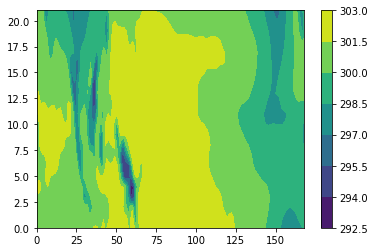

In [8]:
plt.contourf(ds['tas'][0,:,:])
plt.colorbar()

This is a very simple plot, but it looks like we have temperature data.  More details on how to plot maps, make nice lables, and colors, can be found in other examples.